In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


img = cv2.imread('./test_images/messii.png')
img.shape
plt.imshow(img)

In [2]:
img = cv2.imread('./test_images/messii.png')
img.shape

(1901, 1267, 3)

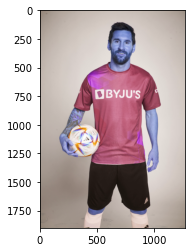

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(1901, 1267)

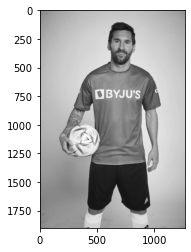

In [5]:
plt.imshow(gray, cmap = 'gray')

In [6]:
gray

array([[128, 128, 128, ..., 136, 136, 136],
       [128, 128, 129, ..., 137, 136, 136],
       [128, 129, 129, ..., 137, 137, 136],
       ...,
       [134, 134, 134, ..., 136, 136, 136],
       [133, 133, 133, ..., 135, 135, 135],
       [133, 133, 133, ..., 133, 133, 133]], dtype=uint8)

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [8]:
faces

array([[583, 172, 265, 265]])

In [9]:
x, y, w, h = faces[0]
print (x, y, w, h)

583 172 265 265


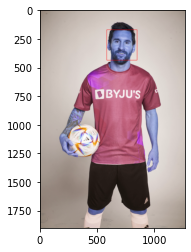

In [10]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

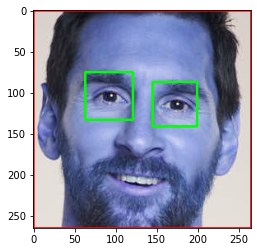

In [11]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    cv2.destroyAllWindows()
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(roi_color, cmap='gray')
plt.show()

In [12]:
def get_cropped_image_if_2_eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    multi_roi_color = []
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            multi_roi_color.append(roi_color)
    return multi_roi_color

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:
cropped_image_dirs = []
player_file_name_dict = {}
ignored = 0
for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split("/")[-1]
    player_file_name_dict[player_name] = []
    for entry in os.scandir(img_dir):
        try: 
            multi_roi_color = get_cropped_image_if_2_eyes(entry.path)
        except Exception:
            print ('Image '+entry.path+' is ignored')
            ignored +=1
        for image in multi_roi_color:
            if image is not None:
                cropped_folder = path_to_cr_data + player_name
                if not os.path.exists (cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print ('generating cropped images in: ', cropped_folder)
                cropped_file_name = player_name + str(count) + '.jpg'
                cropped_file_path = cropped_folder + '/' + cropped_file_name
                cv2.imwrite(cropped_file_path, image)
                player_file_name_dict [player_name].append(cropped_file_path)
                count+=1 

generating cropped images in:  ./dataset/cropped/Haaland
generating cropped images in:  ./dataset/cropped/Mahrez


KeyboardInterrupt: 

In [ ]:
# Adding extra training images for ronaldo to enhance the quality of our model
# Added after finishing the bulding of the model
count = 0
for entry in os.scandir('.\dataset\Ronaldo\Extra'):
    try: 
        multi_roi_color = get_cropped_image_if_2_eyes(entry.path)
    except Exception:
            print ('Image '+entry.path+' is ignored')
    for image in multi_roi_color:
        if image is not None:
            cropped_folder = './dataset/Ronaldo/Extra/cropped'
            cropped_file_name = 'Ronaldo_Extra' + str(count) + '.jpg'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path, image)
            count+=1 

In [ ]:
player_file_name_dict = {}
for cropped_image_dir in cropped_image_dirs:
    player_name = cropped_image_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(cropped_image_dir):
        file_list.append(entry.path)
    player_file_name_dict[player_name] = file_list

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
pic = cv2.imread('./dataset/cropped/Haaland/Haaland8.jpg')
im_haar = w2d(pic,'db1',5)
plt.imshow(im_haar)

In [ ]:
class_dict = {}
count = 0
for player in player_file_name_dict.keys():
    class_dict[player] = count
    count+=1
class_dict


In [ ]:
X = []
y = []
for player, training_images in player_file_name_dict.items():
    for training_image in training_images:
        img = cv2.imread(training_image)
        if img is None:
            continue
        img_scaled = cv2.resize(img, (32,32))
        img_haar = w2d(img, 'db1', 5)
        img_haar_scaled = cv2.resize(img_haar, (32,32))
        combined_img = np.vstack((img_scaled.reshape(32*32*3,1), img_haar_scaled.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player])

In [ ]:
print (y)

In [ ]:
print (len(X))
print (len(y))

In [ ]:
print (len(X[0]))

In [ ]:
X = np.array(X).reshape(len(X), -1).astype(float)
X.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', C = 10))])
pipe.fit(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)

In [ ]:
print (classification_report(y_test, pipe.predict(X_test)))

In [ ]:
conf_matrix = confusion_matrix(y_test, pipe.predict(X_test))
print (conf_matrix)

In [ ]:
ConfusionMatrixDisplay(conf_matrix, display_labels = pipe.classes_).plot()

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

In [ ]:
model_params = {
    'svc': {
        'model': SVC (gamma= 'auto', probability = True),
        'params': {
            'svc__C' : [1, 10, 100, 1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
   'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'random_forest__n_estimators': [1, 5, 10]
       }
  },   
    'logistic_regression': {
        'model': LogisticRegression(solver= 'liblinear', multi_class='auto'),
        'params': {
            'logistic_regression__C': [1, 5, 10]
        }
    },
    'multi_layer_perceptron': {
        'model': MLPClassifier(max_iter = 500, random_state = 0),
        'params': {
            'multi_layer_perceptron__activation': ['tanh', 'relu'],
            'multi_layer_perceptron__alpha': [0.0001, 0.05]
        }
    }
    
  }

In [ ]:
best_scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe_cv = Pipeline ([('standardscaler', StandardScaler()), (algo, mp['model'])])
    clf = GridSearchCV(pipe_cv, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_scores.append({'model': algo,
                        'best_score': clf.best_score_,
                        'best_parameter': clf.best_params_})
    best_estimators[algo] = clf.best_estimator_

In [ ]:
print (best_scores)

In [ ]:
import pandas as pd
df = pd.DataFrame(best_scores)
df

In [ ]:
best_estimators

In [ ]:
print ('the score of the svc model is: ', best_estimators['svc'].score(X_test, y_test))
#print ('the score of the random_forest model is: ', best_estimators['random_forest'].score(X_test, y_test))
print ('the score of the logistic_regression model is: ', best_estimators['logistic_regression'].score(X_test, y_test))
print ('the score of the multi_layer_perceptron model is: ', best_estimators['multi_layer_perceptron'].score(X_test, y_test))

In [ ]:
conf_matr_mlpc = confusion_matrix(y_test, best_estimators['multi_layer_perceptron'].predict(X_test))
conf_matr_svc = confusion_matrix(y_test, best_estimators['svc'].predict(X_test))
#conf_matr_random_forest = confusion_matrix(y_test, best_estimators['random_forest'].predict(X_test))
conf_matr_logistic_regression = confusion_matrix(y_test, best_estimators['logistic_regression'].predict(X_test))

In [ ]:
ConfusionMatrixDisplay(conf_matr_mlpc).plot()

In [ ]:
ConfusionMatrixDisplay(conf_matr_svc).plot()

In [ ]:
ConfusionMatrixDisplay(conf_matr_random_forest).plot()

In [ ]:
ConfusionMatrixDisplay(conf_matr_logistic_regression).plot()

In [ ]:
class_dict

In [ ]:
best_clf = best_estimators['svc']

In [ ]:
img = cv2.imread('lyes.jpg')
plt.show(img)

In [ ]:
import joblib
joblib.dump(best_clf, 'saved_model.pk1')

In [ ]:
import json
with open ('class_dictionary.json', 'w') as f:
    json.dump(class_dict, f)